# Introduction of First Version “Deception”

## In the First Version “Redesign” , I finished all the work by excel and Tableau. So the work is irreproducible. At the revised version, all the works are data cleaning and visualization works done by Python. What I try to acieve in revised version are using coleb to finish all the work and thinking creative arguments for each finding. I want to use the visualization to become a part of data analysis , instead of presenting the facts.

In [21]:
!pip install xlrd
!pip install pygal
!pip install openpyxl
!pip install matplotlib
from scipy import *
from numpy import *
from scipy import stats, integrate
from plotly.graph_objs import *
import plotly.plotly as py
import plotly.plotly as py
import pandas as pd 
import numpy as np
import seaborn as sns
import pygal
import os
import matplotlib.pyplot as plt; plt.rcdefaults()
sns.set(color_codes=True)
%matplotlib inline
import plotly.tools as tls
tls.set_credentials_file(username='username', api_key='api-key')

    100% |████████████████████████████████| 174kB 10.9MB/s 
  Running setup.py bdist_wheel for openpyxl ... - \ done
  Stored in directory: /content/.cache/pip/wheels/11/7d/47/3dad56b5d260c790d9110623ba66783a2ad345eb76dd63003b
  Running setup.py bdist_wheel for et-xmlfile ... - done
  Stored in directory: /content/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


## Finding 1: US's firearm homecide rate is veryamong those high violent countries!

## Argument and Definition

1.Argument: 
From the data, I define US is one of the high violent death countries. I want to argue that the firearm homecide rate of United States is low actually in thes countries. 

2.Definition: 
1.I define the high voilent death coutries as those countries' violent death number is over than 10,000. 

2.The definition of Firearm Homicide Rate is the number of death by firearm per 100,000 People.



# Step 1 : Load the main data. The data can be found from the link below 

In [5]:
from google.colab import files
uploaded = files.upload()

Saving death_rate_by_firearm.xlsx to death_rate_by_firearm.xlsx


In [142]:
death = pd.read_excel('death_rate_by_firearm.xlsx', index=False)
death.head()

,Country (ISO 3166 Alpha-3),Country,Count,Rate,Unnamed: 4
0,SLV,El Salvador,4602,72.532729,NaN
1,VEN,Venezuela,20291,64.276752,NaN
2,SYR,Syrian Arab Republic,9375,50.866899,NaN
3,HND,Honduras,4055,44.497522,NaN
4,KNA,Saint Kitts and Nevis,22,40.130607,NaN


# Step 2 : Data manipulation by choosing the columns I need and filtering the countries that qaulified as the high violent countries

In [209]:
death2 = death.iloc[:,1:4]
death3 =death2.query('Count>=10000')
death3.sort_values("Count", inplace=True)
death3.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country,Count,Rate
43,Nigeria,10094,5.427184
61,United States,10147,3.149486
27,Mexico,11031,8.649023
1,Venezuela,20291,64.276752
10,Brazil,44093,21.233995


In [8]:
death3.iloc[:,1].count()

5

## From the above step, I found there are five coutries was defined as high violent death countries.

#Step 3: Choose the different columns as independent dataframe


In [0]:
country = death3.iloc[:,0]
count = death3.iloc[:,1]
rate = death3.iloc[:,2]

#Step 4: Give a overview of number of death of those high violent death countries. At here, I found the US ranks the 3rd for number of death in 2016. 


Text(0.5,1,u'Number of death in high violent death countries in 2016')

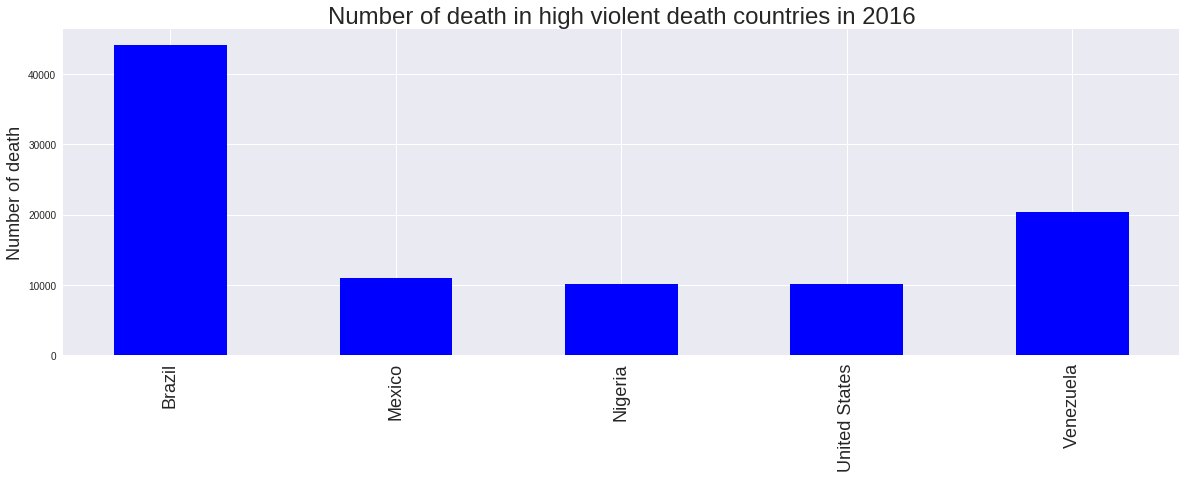

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 6
width = 0.5
plt.xticks(rotation=90 ,fontsize=18)
plt.bar(country, count, width, color="blue")
plt.ylabel('Number of death', fontsize=18)
plt.title('Number of death in high violent death countries in 2016', fontsize=24)

#step 5: Final Visualization!  At this step , I proved my argument that US homecide rate is the lowest among its peers. 

Text(0.5,1,u'The firearm homecide rate of US is low among high violent countries')

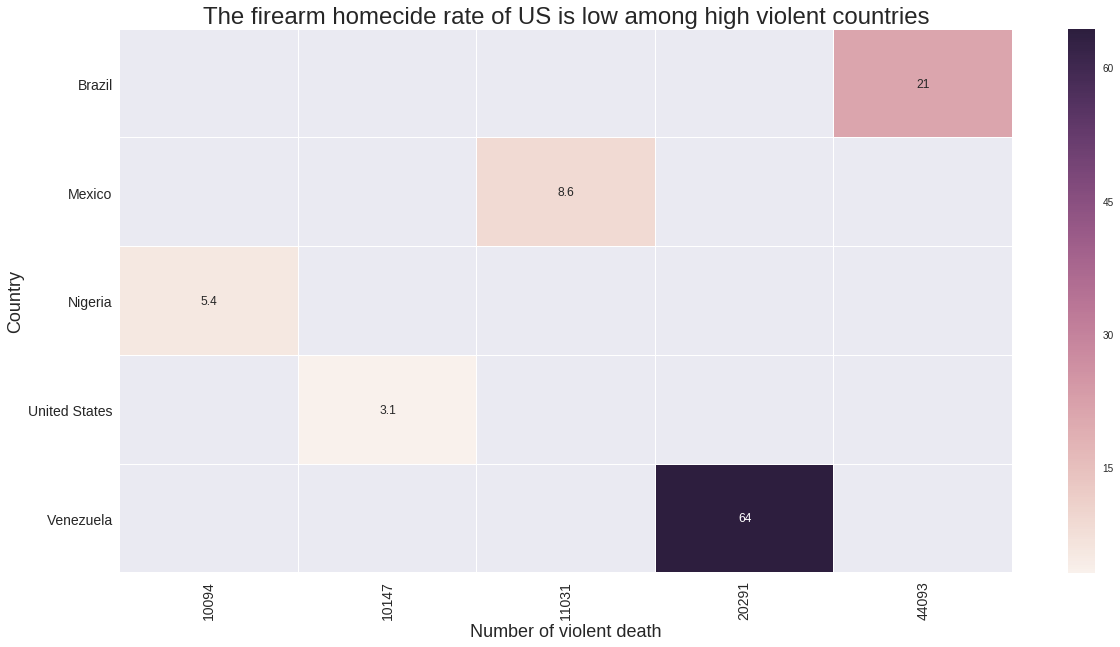

In [11]:

sns.set()

flights = death3.pivot("Country","Count" ,"Rate")

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(flights, annot=True, linewidths=.1, ax=ax)

plt.xticks(rotation=90 ,fontsize=14)
plt.yticks(rotation=0 ,fontsize=14)
plt.ylabel('Country', fontsize=18)
plt.xlabel('Number of violent death', fontsize=18)
plt.title('The firearm homecide rate of US is low among high violent countries', fontsize=24)

#Data resource:
Interactive Maps and Charts of Armed Violence Indicators
http://www.smallarmssurvey.org/?id=1253

#Reference:
International Firearm Homicide Rates ,last updated on: 8/7/2017
https://gun-control.procon.org/view.resource.php?resourceID=006082

# Finding 2 To avoid the mass shooting, you might consider to live in the high crime rate cities.

# Argument and Definition

## Argurment: 
For this finding, I want to check the correlation between Mass Shooting and Crime Rate. In the end, I found out that the crime rate is not related to the number of people affected(death,injured) by Mass Shooting. 

## Definition
1.The violent crime figures include the offenses of murder, rape (legacy definition), robbery, and aggravated assault.
2.Crime rate is the violent crim figure per 100,000 Inhabitants.
3.The number of people affected by mass shooting is to add number of death people and number of injured people in mass shooting event.

# Step 1 : Load the main dataset : Mass Shooting Event Level Data

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Mass Shooting Case All Years.xlsx to Mass Shooting Case All Years.xlsx


In [146]:
mass = pd.read_excel('Mass Shooting Case All Years.xlsx', index=False)
mass.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"May 16, 2018",Texas,Ponder,610 Lone Star Park Ln,5,1,NaN
1,"May 14, 2018",Maryland,Baltimore,2020 Etting St,0,4,NaN
2,"May 13, 2018",California,Stockton,2436 Belleview Street,3,2,NaN
3,"May 13, 2018",Mississippi,Byhalia,French Rd and Berta Rd,0,4,NaN
4,"May 13, 2018",California,Los Angeles,365 W Manchester Avenue,2,2,NaN


# Step 2 : Data Manipulation : Clean the main dataset by choosing the columns I needed and create another column that useful for further analysis

In [147]:
mass_need = pd.concat([mass.iloc[:, mass.columns.get_loc('State'):mass.columns.get_loc('Address')], mass.iloc[:, mass.columns.get_loc('# Killed'):mass.columns.get_loc('Operations')]], axis=1)
mass_need['sum_of_kill_and_injured'] = mass_need['# Killed'] +mass_need['# Injured']
mass_need.head()
#mass_need.isnull().sum()

,State,City Or County,# Killed,# Injured,sum_of_kill_and_injured
0,Texas,Ponder,5,1,6
1,Maryland,Baltimore,0,4,4
2,California,Stockton,3,2,5
3,Mississippi,Byhalia,0,4,4
4,California,Los Angeles,2,2,4


In [148]:
print(mass_need['City Or County'].count())
print(mass_need['City Or County'].nunique())

500
263


# Step 3: combine the state and city/county columns as a new column. This is for further combination with another dataset.

In [149]:
mass_need["location"] = mass_need["State"].map(str) +'_' +mass_need["City Or County"]
mass_need.head()

,State,City Or County,# Killed,# Injured,sum_of_kill_and_injured,location
0,Texas,Ponder,5,1,6,Texas_Ponder
1,Maryland,Baltimore,0,4,4,Maryland_Baltimore
2,California,Stockton,3,2,5,California_Stockton
3,Mississippi,Byhalia,0,4,4,Mississippi_Byhalia
4,California,Los Angeles,2,2,4,California_Los Angeles


# Step 4: Group by location to know the number of people was affected by mass shooting

In [150]:
mass_need_sum= mass_need.groupby(['location']).sum_of_kill_and_injured.sum()
mass_need_sum.columns = ['location', 'sum_of_kill_and_injured']
mass_need_sum.head()

location
Alabama_Birmingham    14
Alabama_Eutaw          5
Alabama_Huntsville     4
Alabama_Hurtsboro      4
Alabama_Lanett         9
Name: sum_of_kill_and_injured, dtype: int64

#Step 5: Download manipulated dataframe to excel for further combination with dateset. Using this way to combine is due to limited programing ability. 

In [0]:
from google.colab import files
mass_need_sum.to_excel('mass_need_sum.xlsx')
files.download('mass_need_sum.xlsx')

# Step 6 : Load the another dataset : City level Crime Rate in US. I want to combine this dataset with the mass shooting dataset 

In [25]:
from google.colab import files
uploaded = files.upload()

Saving United States cities by crime rate.xlsx to United States cities by crime rate.xlsx


In [26]:
crime = pd.read_excel('United States cities by crime rate.xlsx', index=False)
crime.head()

,State,City,Population,Total Violent Crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft
0,Minnesota,Bloomington,84596,NaN,-,NaN,69.7,74.5,3796.9,268.3,3437.5,91.0
1,Minnesota,Brooklyn Park,77346,NaN,5.2,NaN,117.7,157.7,3399.0,637.4,2587.1,174.5
2,Minnesota,Burnsville,61218,NaN,-,NaN,27.8,140.5,2956.6,330.0,2509.1,117.6
3,Minnesota,Coon Rapids,62301,NaN,1.6,NaN,25.7,67.4,3077.0,311.4,2669.3,96.3
4,Minnesota,Duluth,86830,NaN,2.3,NaN,103.7,245.3,4446.6,739.4,3509.2,198.1


# Step 7 : Choose the columns that I need for analysis. At here , I just need to use column Total Violent Crime(Rate)


In [152]:
crime_rate = pd.concat([crime.iloc[:, crime.columns.get_loc('State'):crime.columns.get_loc('Population')], crime.iloc[:, crime.columns.get_loc('Total Violent Crime'):crime.columns.get_loc('Murder and nonnegligent manslaughter')]], axis=1)
crime_rate.tail()

,State,City,Total Violent Crime
595,Connecticut,Greenwich,37.1
596,Texas,Flower Mound,30.9
597,Indiana,Fishers,17.6
598,Indiana,Carmel,13.4
599,Minnesota,Rochester,NaN


#Step 8: clean the dataset by removing the NaN. Some total violnet crim show Nan, so I need to remove those rows for further analysis. I double checked there is not NaN in my dataset.

In [153]:
crime_rate_clean = crime_rate[pd.notnull(crime_rate['Total Violent Crime'])]
#verify there is no nan in the dataset
crime_rate_clean.isnull().sum()

State                  0
City                   0
Total Violent Crime    0
dtype: int64

# Step 9: combine the state and city/county columns into a new column named "location". For this way, I can combine two dataset together.

In [154]:
crime_rate_clean["location"] = crime_rate_clean["State"].map(str) +'_' +crime_rate_clean["City"]
crime_rate_clean.head()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,State,City,Total Violent Crime,location
10,Michigan,Flint,2729.5,Michigan_Flint
11,New Jersey,Camden,2566.1,New Jersey_Camden
12,Missouri,St. Louis,1817.1,Missouri_St. Louis
13,Michigan,Detroit,1759.6,Michigan_Detroit
14,Tennessee,Memphis,1740.1,Tennessee_Memphis


#Step 10: Download Dataframe to excel for further combination

In [0]:
from google.colab import files
crime_rate_clean.to_excel('crime_rate_clean.xlsx')
files.download('crime_rate_clean.xlsx')

#Step 11: Combine two datasets with excel vlookup function. Due to my limited programming skills. I spent hours want to combine mass shooting dataset and crime rate dataset ,but still in vain. So I use excel vlookup function in excel to combine two datasets.

In [53]:
from google.colab import files
uploaded = files.upload()

Saving sum_of_kill_and_injured_join.xlsx to sum_of_kill_and_injured_join.xlsx


# Step 12: Choose the columns that I need and double checked the number of people affect are not 0 

In [177]:
join = pd.read_excel('sum_of_kill_and_injured_join.xlsx', index=False)
join1 = join.iloc[:,0:3]
join_sorted = join1.sort_values(by='Violent Crime', ascending=False)
join2 = join_sorted [join['sum_of_kill_and_injured_join'] ==0]
join2.count()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



location                        0
Violent Crime                   0
sum_of_kill_and_injured_join    0
dtype: int64

In [0]:
#join_sorted_clean = join_sorted[pd.notnull(join_sorted['sum_of_kill_and_injured_join'])]
#verify there is no nan in the dataset
#join_sorted_clean.isnull().sum()

# Step 13: Due to Violent Crime figure in each city is different, I want to categoies into 3 level ( high, middle and low). For this way, I can better analyze the relationship bettwen crime rate and mass shooting.

In [184]:
print(join_sorted_clean['Violent Crime'].max()) # Max
print(join_sorted_clean['Violent Crime'].min()) # Min
print((join_sorted_clean['Violent Crime'].max()-join_sorted_clean['Violent Crime'].min())/3) # 

2729.5
61.9
889.1999999999999


In [191]:
join_sorted_clean['crime_rate'] = join_sorted_clean['Violent Crime'].apply(lambda x: 'Low' if x <= (61.9+890) else 'High'  \
                                                                                        if x>=(2729.5-890) else 'Middle')
join_sorted_clean.head()

,location,Violent Crime,sum_of_kill_and_injured_join,crime_rate
338,michigan_flint,2729.5,12.0,High
377,new jersey_camden,2566.1,4.0,High
336,michigan_detroit,1759.6,34.0,Middle
488,tennessee_memphis,1740.1,49.0,Middle
202,delaware_wilmington,1703.5,4.0,Middle


In [0]:
join_label =(join_sorted_clean.groupby(['crime_rate', 'sum_of_kill_and_injured_join'], as_index=False).mean())

In [193]:
join_label2 =(join_label.groupby(['crime_rate']).mean())
join_label2.sort_values(by='sum_of_kill_and_injured_join', ascending=False)

,sum_of_kill_and_injured_join,Violent Crime
crime_rate,,
Low,45.166667,667.696899
Middle,25.052632,1270.570526
High,8.000000,2647.800000


# Step 14: visualization: Compare the crime rate with the mass shooting. Surprisingly, I found that they are negatively correlated. 

Text(0,0.5,u'Number of People affected by Mass Shooting')

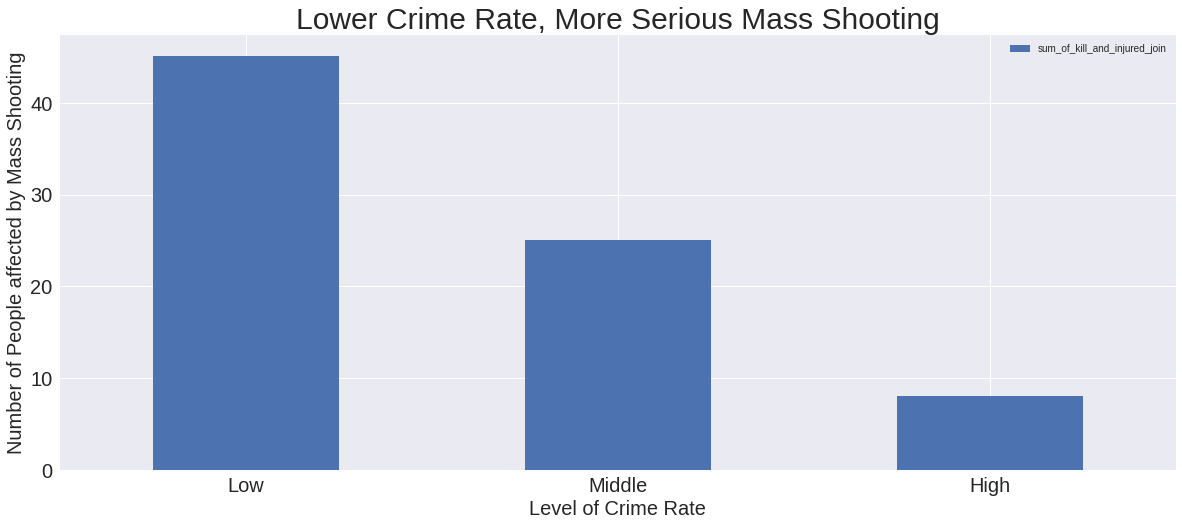

In [211]:
df2 = pd.DataFrame(join_label2, columns=['sum_of_kill_and_injured_join'])
df2 = df2.sort_values(by='sum_of_kill_and_injured_join', ascending=False)

ax = df2.plot.bar(stacked=True, figsize=(20,8), legend=True, fontsize=20, align='center')
ax.set_title('Lower Crime Rate, More Serious Mass Shooting',fontsize=30)
ax.set_xlabel("Level of Crime Rate",fontsize=20,rotation=0)
plt.xticks(rotation=0)
ax.set_ylabel("Number of People affected by Mass Shooting",fontsize=20)

#Data Resource:

United States cities by crime rate (60,000–100,000)
https://en.wikipedia.org/wiki/United_States_cities_by_crime_rate_(60,000%E2%80%93100,000)

United States cities by crime rate (100,000–250,000)
https://en.wikipedia.org/wiki/United_States_cities_by_crime_rate_(100,000%E2%80%93250,000)

List of United States cities by crime rate
https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate

MASS SHOOTINGS   
http://www.gunviolencearchive.org/mass-shooting

# Finding 3: When Gun Ownership Rate is higher , the Murder Rate is lower

# Argument and Definition

## Argurment: 
I want to review the relationship between the US gun ownership rate and murder rate. I want to argue that when people know people around themselve have the gun, they will hesitate to murder the other. 

## Definition:
1.Murder rate is number of Murder and nonnegligent manslaughter per 100,000 people.The states whose murder rates over than 10.85 are considered high level murder rate state. Otherwise is low murder rate states

2.Gun ownership rate is number of gun per 100 people


# Step 1: Load the main dataset: Gun ownership rate in each state of US. 

In [61]:
from google.colab import files
uploaded = files.upload()

Saving Gun Ownership by State.xlsx to Gun Ownership by State.xlsx


In [0]:
gun_ownership = pd.read_excel('Gun Ownership by State.xlsx', index=False)


#Step 2: Data Manipulation by choosing the columns needed for analysis and changing names of the columns.

In [196]:
gun_ownership = gun_ownership.iloc[:,0:2]
gun_ownership.columns = ['country','ownership_rate']
gun_ownership.sort_values("country", inplace=True)
gun_ownership.head()

,country,ownership_rate
0,Alabama,48.9
1,Alaska,61.7
2,Arizona,32.3
3,Arkansas,57.9
4,California,20.1


# Step 3: Download the dataframe for further combination and analysis

In [0]:
from google.colab import files

gun_ownership.to_excel('gun_ownership_combine.xlsx')
files.download('gun_ownership_combine.xlsx')

# Step 4: Upload the state level crime rate dataset for data manipulation

In [67]:
from google.colab import files
uploaded = files.upload()

Saving Crime by State 2016.csv to Crime by State 2016.csv


In [68]:
crime_state = pd.read_csv('Crime by State 2016.csv', index_col=False)


,Area,Year,Population2,Violent crime,"Violent crime Rate per 100,000",Murder and nonnegligent manslaughter,"Rate per 100,000",Rape (revised definition)4,"Rate per 100,000.1",Rape (legacy definition)5,...,Aggravated assault,"Rate per 100,000.4",Property crime,"Rate per 100,000.5",Burglary,"Rate per 100,000.6",Larceny-theft,"Rate per 100,000.7",Motor vehicle theft,"Rate per 100,000.8"
1,Alabama,2016,4863300,25886,532.3,407,8.4,1916,39.4,1385,...,18877,388.2,143362,2947.8,34065,700.5,97574,2006.3,11723,241.1
3,Alaska,2016,741894,5966,804.2,52,7.0,1053,141.9,757,...,4011,540.6,24876,3353.0,4053,546.3,17766,2394.7,3057,412.1
5,Arizona,2016,6931071,32583,470.1,380,5.5,3290,47.5,2452,...,21858,315.4,206432,2978.4,37736,544.4,150275,2168.1,18421,265.8
7,Arkansas,2016,2988248,16461,550.9,216,7.2,2143,71.7,1545,...,11982,401.0,97673,3268.6,23771,795.5,66747,2233.6,7155,239.4
9,California,2016,39250017,174796,445.3,1930,4.9,13702,34.9,10149,...,104375,265.9,1002070,2553.0,188304,479.8,637010,1623.0,176756,450.3


#Step 5: Clean the dataset by choosing data in 2016 and columns that need for further analysis. 

In [198]:
is_2016 =  crime_state['Year']==2016
crime_state_2016 = crime_state[is_2016]
crime_state_2016.head()

,Area,Year,Population2,Violent crime,"Violent crime Rate per 100,000",Murder and nonnegligent manslaughter,"Rate per 100,000",Rape (revised definition)4,"Rate per 100,000.1",Rape (legacy definition)5,...,Aggravated assault,"Rate per 100,000.4",Property crime,"Rate per 100,000.5",Burglary,"Rate per 100,000.6",Larceny-theft,"Rate per 100,000.7",Motor vehicle theft,"Rate per 100,000.8"
1,Alabama,2016,4863300,25886,532.3,407,8.4,1916,39.4,1385,...,18877,388.2,143362,2947.8,34065,700.5,97574,2006.3,11723,241.1
3,Alaska,2016,741894,5966,804.2,52,7.0,1053,141.9,757,...,4011,540.6,24876,3353.0,4053,546.3,17766,2394.7,3057,412.1
5,Arizona,2016,6931071,32583,470.1,380,5.5,3290,47.5,2452,...,21858,315.4,206432,2978.4,37736,544.4,150275,2168.1,18421,265.8
7,Arkansas,2016,2988248,16461,550.9,216,7.2,2143,71.7,1545,...,11982,401.0,97673,3268.6,23771,795.5,66747,2233.6,7155,239.4
9,California,2016,39250017,174796,445.3,1930,4.9,13702,34.9,10149,...,104375,265.9,1002070,2553.0,188304,479.8,637010,1623.0,176756,450.3


In [200]:
crime_state_select = pd.concat([crime_state_2016.iloc[:, crime_state_2016.columns.get_loc('Area'):crime_state_2016.columns.get_loc('Year')],\
                                crime_state_2016.iloc[:, crime_state_2016.columns.get_loc('Rate per \n100,000'):crime_state_2016.columns.get_loc('Rape\n(revised definition)4')]], axis=1)
crime_state_select.columns = ['country', 'murder_rate']
crime_state_select.sort_values("country", inplace=False)
crime_state_select.head()

,country,murder_rate
1,Alabama,8.4
3,Alaska,7.0
5,Arizona,5.5
7,Arkansas,7.2
9,California,4.9


# Step 6: Download the dataframe for further combination and analysis

In [0]:
from google.colab import files
crime_state_select.to_excel('crime_state_select.xlsx')
files.download('crime_state_select.xlsx')

# Step 7: Upload the dataframe for further combination and analysis. The two dataset was combined through excel by vlookup function.

In [202]:
from google.colab import files
uploaded = files.upload()

Saving crime_state_select_combine_ownership.xlsx to crime_state_select_combine_ownership (2).xlsx


In [201]:
combine = pd.read_excel('crime_state_select_combine_ownership (1).xlsx')
combine_sorted = combine.sort_values(by='ownership_rate', ascending=False)
combine_sorted.head()

,country,murder_rate,ownership_rate
2,Alaska,7.0,61.7
4,Arkansas,7.2,57.9
13,Idaho,2.9,56.9
49,West Virginia,4.4,54.2
51,Wyoming,3.4,53.8


# Step 8: Get a overview of murder rates in each state by visualizaton. This is not the final visualization of finding 3.  

Text(0.5,1,u'Murder Rates In each US State')

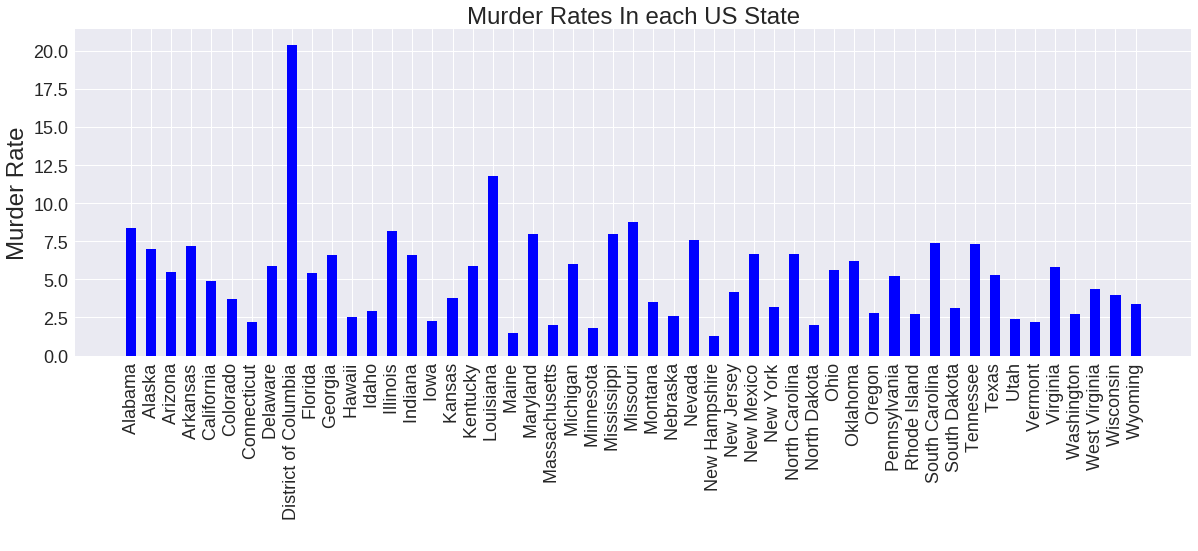

In [206]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 6
width = 0.5
plt.xticks(rotation=90 ,fontsize=18)
plt.yticks(rotation=0 ,fontsize=18)
plt.bar(combine_sorted['country'], combine_sorted['murder_rate'], width, color="blue")
plt.ylabel('Murder Rate', fontsize=24)
plt.title('Murder Rates In each US State', fontsize=24)

# Step 9 : Separate the murder rate into two levels(high and low)

In [207]:
print(combine_sorted['murder_rate'].max()) # Max
print(combine_sorted['murder_rate'].min()) # Min
print((combine_sorted['murder_rate'].max()-combine_sorted['murder_rate'].min())/2) # 

20.4
1.3
9.549999999999999


In [208]:
combine_sorted['murder_rate_level'] = combine_sorted['murder_rate'].apply(lambda x: 'Low' if x <= (1.3+9.55) else 'High')
combine_sorted.head()

,country,murder_rate,ownership_rate,murder_rate_level
2,Alaska,7.0,61.7,Low
4,Arkansas,7.2,57.9,Low
13,Idaho,2.9,56.9,Low
49,West Virginia,4.4,54.2,Low
51,Wyoming,3.4,53.8,Low


# Step 10: Calculate the average value of murder rate and gun ownership rate in each level of murder rate.

In [117]:
combine_label =(combine_sorted.groupby(['murder_rate_level'], as_index=False).mean())
combine_label.sort_values("ownership_rate", inplace=False)

,murder_rate_level,murder_rate,ownership_rate
0,High,16.100000,32.600000
1,Low,4.763265,32.961224


In [118]:
combine_label['ownership_rate_level'] = combine_label['ownership_rate'].apply(lambda x: 'Low' if x <= (32.6) else 'High')
combine_label.head()

,murder_rate_level,murder_rate,ownership_rate,ownership_rate_level
0,High,16.100000,32.600000,Low
1,Low,4.763265,32.961224,High


# Step 11: Final Visualization. I found that when gun ownership is high, the murder rate is acually low. 

Text(0.5,1,u'Surprise!When gun ownership rate is high , the murder rate is low')

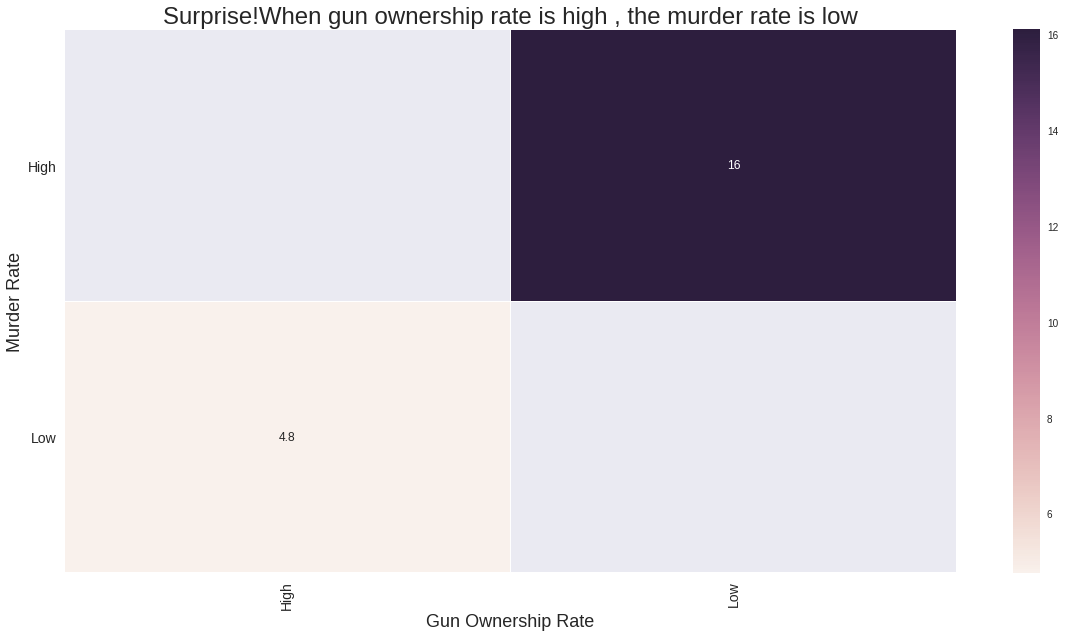

In [141]:
sns.set()

comp = combine_label.pivot("murder_rate_level","ownership_rate_level", "murder_rate")

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(comp, annot=True, linewidths=.1, ax=ax)

#plt.legend(fontsize=20)    # legend fontsize
plt.xticks(rotation=90 ,fontsize=14)
plt.yticks(rotation=0 ,fontsize=14)
plt.ylabel('Murder Rate', fontsize=18)
plt.xlabel('Gun Ownership Rate', fontsize=18)
plt.title('Surprise!When gun ownership rate is high , the murder rate is low', fontsize=24)


##Data Resource:

Crime in the United States1
by Region, Geographic Division, and State, 2015–2016

https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-2

Gun ownership and social gun culture Bindu Kalesan,1 Marcos D Villarreal,1 Katherine
M Keyes,1 Sandro Galea

http://injuryprevention.bmj.com/content/injuryprev/early/2015/06/09/injuryprev-2015-041586.full.pdf?keytype=ref&ijkey=doj6vx0laFZMsQ2

# Reflection of First Version “Deception”
## At this First Version “Deception”, I am excited for combining different dataset to make instersting arguments. Some of the arguments are surprising to myself, such as high gun ownership rate states has low murder rates. This reminds me a conversation with a homeless veteran in front of 7-elevan. He suggested me to buy a gun to protect myself ,especially when I about to go hiking.

##However , I felt quite chanlleging to clean the dataset and visualize the data with python. It's quite time consuming for the entry-level programmer. This will be one of the things I need to make effort before revised version. 